# section 10

In [21]:
%%HTML
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 80%; }
    div#maintoolbar-container { width: 99%; }
</style>

## 91 read data

In [22]:
import pandas as pd
survey = pd.read_csv(
    "./sample_100knocks/10章/survey.csv",
    encoding="utf-8",
    engine="python",
)
print(survey.shape)
print(survey.info())
survey.head()

(86, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
datetime        86 non-null object
comment         84 non-null object
satisfaction    86 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.1+ KB
None


,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(AA駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [23]:
survey.dropna(inplace=True)

## 92 exclude unnecessary words

In [24]:
survey.comment = survey.comment.str.replace("\(.+?\)", "", regex=True)
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [25]:
survey.comment = survey.comment.str.replace("（.+?）", "", regex=True)
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2


## 93 count words and plot a histgram

In [26]:
survey["length"] = survey.comment.str.len()
survey.head()

,datetime,comment,satisfaction,length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9


(array([11., 24., 21., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <a list of 10 Patch objects>)

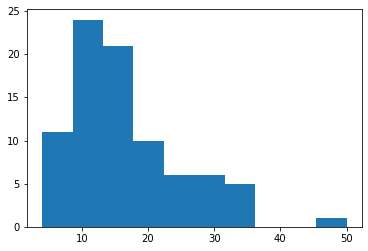

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

survey.length = survey.length.astype(int)
plt.hist(survey.length)

In [32]:
import MeCab

tagger = MeCab.Tagger()
text = "すもももももももものうち"
words = tagger.parse(text)
words

'すもも\t名詞,一般,*,*,*,*,すもも,スモモ,スモモ\nも\t助詞,係助詞,*,*,*,*,も,モ,モ\nもも\t名詞,一般,*,*,*,*,もも,モモ,モモ\nも\t助詞,係助詞,*,*,*,*,も,モ,モ\nもも\t名詞,一般,*,*,*,*,もも,モモ,モモ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\nうち\t名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ\nEOS\n'

In [35]:
words = tagger.parse(text).splitlines()
[word.split() for word in words]

[['すもも', '名詞,一般,*,*,*,*,すもも,スモモ,スモモ'],
 ['も', '助詞,係助詞,*,*,*,*,も,モ,モ'],
 ['もも', '名詞,一般,*,*,*,*,もも,モモ,モモ'],
 ['も', '助詞,係助詞,*,*,*,*,も,モ,モ'],
 ['もも', '名詞,一般,*,*,*,*,もも,モモ,モモ'],
 ['の', '助詞,連体化,*,*,*,*,の,ノ,ノ'],
 ['うち', '名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ'],
 ['EOS']]

## 95 tokenize and extract varb and noun

In [36]:
words = tagger.parse(text).splitlines()
words_arr = []
parts = ["名詞", "動詞"]
for i in words:
    if i == "EOS" or i == "":
        continue
        
    word_tmp = i.split()[0]
    part = i.split()[1].split(",")[0]
    if not (part in parts):
        continue
        
    words_arr.append(word_tmp)
    
words_arr

['すもも', 'もも', 'もも', 'うち']

## 96 noun frequency

In [42]:
all_words = []
for text in survey.comment.values:

    words_arr = []
    words = tagger.parse(text).splitlines()
    for i in words:
        if i == "EOS" or i == "":
            continue

        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if part != "名詞":
            continue

        words_arr.append(word_tmp)

    all_words.extend(words_arr)

print(all_words)

['駅前', '若者', 'スポーツ', '場所', 'の', '子育て', '支援', '保育園', '駅前', '商店', '街', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '小学校', '綺麗', '公園', '近く', '公園', 'スーパー', 'の', '大変', '子育て', 'デートスポット', '商店', '街', '夜道', 'ゴミ', '処理', '楽', '映画', '館', '街路', '樹', '公園', '追加', '観光', 'スポット', '子育て', '道', '綺麗', '都内', 'アクセス', '家賃', 'リーズナブル', 'BBB', '渋滞', '商店', '街', '屋根', '雨', '大変', '商店', '街', 'たくさん', '喫茶店', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転車', 'ランニング', '運動', '場所', '有名', '企業', '駅前', '駐車', '場', '変', 'おじさん', '声', '事', '警察', '巡回', '強化', '消防', '団', '活発', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', 'よう', '氾濫', '防止', '説明', '信号', '交差点', 'ｘｘｘ', '事故', 'そう', '信号', '商店', '街', '活性', '化', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪場', '不便', '街路', '樹', '落ち葉', '掃除', '大変', '街路', '樹', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治体', '支援', '自治体', '活動', '頻繁', '安心', '観光', '地', '最近', '県', 'ナンバー', '車', '防犯', 'の', '駐車', '場', '数', '料金', '駅前', '公共', '駐車', '場

In [44]:
all_words_df = pd.DataFrame({"words": all_words, "count": [1] * len(all_words)})
all_words_df = all_words_df.groupby("words", as_index=False).sum()
word_count_df = all_words_df.sort_values(["count"], ascending=False)
word_count_df.head()

,words,count
178,駅前,7
64,場所,6
145,街,6
8,の,5
45,公園,5


## 97 remove stop words

In [47]:
stop_words = ["の"]
word_count_df = word_count_df[word_count_df.words.isin(stop_words) == False]
word_count_df.head()

,words,count
178,駅前,7
64,場所,6
145,街,6
45,公園,5
55,商店,5


## a relationship between satisfaction and word frequency

In [69]:
all_words = []
satisfaction = []
for _, row in survey.iterrows():
    words = tagger.parse(row.comment).splitlines()
    for i in words:
        if i == "EOS" or i == "":
            continue

        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if part != "名詞":
            continue

        all_words.append(word_tmp)
        satisfaction.append(row.satisfaction)

all_words_df = pd.DataFrame({"words": all_words, "count": [1] * len(all_words)})
all_words_df = all_words_df.groupby("words", as_index=False).sum()

all_words_df2 = pd.DataFrame({"words": all_words, "satisfaction": satisfaction})
all_words_df2 = all_words_df2.groupby("words", as_index=False).mean()

words_df = pd.merge(all_words_df, all_words_df2, on="words", how="left")

stop_words = ["の"]
words_df = words_df[words_df.words.isin(stop_words) == False]

words_df.head()

,words,count,satisfaction
0,BBB,1,2.0
1,^^,1,5.0
2,おじさん,1,1.0
3,ごみ,1,2.0
4,そう,1,1.0


In [72]:
words_df = words_df[words_df["count"] > 2].sort_values(["satisfaction"], ascending=False)
words_df.head()

,words,count,satisfaction
75,子育て,3,4.333333
134,綺麗,3,4.333333
77,安心,3,4.333333
19,スポーツ,3,3.666667
165,道,3,3.000000


## 99 create features

In [76]:
uniq_words = words_df.words
word_to_id = {word: i for i, word in enumerate(uniq_words)}

stop_words = ["の"]

data = []
for _, row in survey.iterrows():
    line = [0] * len(uniq_words)
    words = tagger.parse(row.comment).splitlines()
    for i in words:
        if i == "EOS" or i == "":
            continue

        word_tmp = i.split()[0]
        if word_tmp in stop_words:
            continue

        part = i.split()[1].split(",")[0]
        if part != "名詞":
            continue

        if word_tmp not in word_to_id:
            continue

        line[word_to_id[word_tmp]] = 1

    data.append(line)
    
df = pd.DataFrame(data, columns=uniq_words)
df.head()

words,子育て,綺麗,安心,スポーツ,道,役所,支援,場所,街,施設,...,時,災害,樹,街路,者,駅前,大変,信号,場,駐車
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## 100 find similar questionnaires

In [77]:
print(survey["comment"].iloc[2])
target_text = df.iloc[2]
print(target_text)

子育て支援が嬉しい
words
子育て     1
綺麗      0
安心      0
スポーツ    0
道       0
役所      0
支援      1
場所      0
街       0
施設      0
商店      0
公園      0
対応      0
時       0
災害      0
樹       0
街路      0
者       0
駅前      0
大変      0
信号      0
場       0
駐車      0
Name: 2, dtype: int64


In [80]:
import numpy as np

cos_sim = []
for i in range(len(df)):
    cos_text = df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text) * np.linalg.norm(cos_text))
    cos_sim.append(cos)
    
df["cos_sim"] = cos_sim
df.sort_values(["cos_sim"], ascending=False).head()

C:\Users\igarashi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


words,子育て,綺麗,安心,スポーツ,道,役所,支援,場所,街,施設,...,災害,樹,街路,者,駅前,大変,信号,場,駐車,cos_sim
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
24,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.707107
50,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.707107
33,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.707107
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.707107


In [85]:
print(survey["comment"].iloc[2])
print(survey["comment"].iloc[24])
print(survey["comment"].iloc[50])
print(survey["comment"].iloc[33])

子育て支援が嬉しい
子育てがしやすい
地域の自治体をもっと支援してほしい
働くママの支援をもっと増やして欲しい
